In [22]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [23]:
train_X=np.linspace(-1,1,100)
train_Y = 2*train_X+np.random.randn(*train_X.shape)*0.3

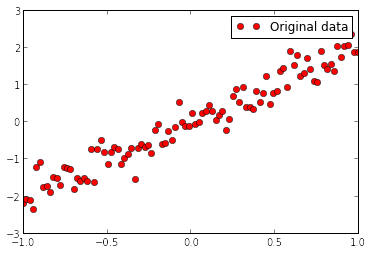

In [24]:
plt.plot(train_X,train_Y,'ro',label='Original data')
plt.legend()
plt.show()

In [25]:
#模型
X=tf.placeholder('float')
Y=tf.placeholder('float')
W=tf.Variable(tf.random_normal([1]),name='weight')
b=tf.Variable(tf.zeros([1]),name='bias')
z=tf.multiply(X,W)+b


In [26]:
#反向优化
cost=tf.reduce_mean(tf.square(Y-z))
learning_rate=0.01
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

epoch 1 cost 1.23299 w [ 0.38083407] b [ 0.46556467]
epoch 3 cost 0.178437 w [ 1.58648872] b [ 0.14032377]
epoch 5 cost 0.0951061 w [ 1.91318262] b [ 0.01726923]
epoch 7 cost 0.0902817 w [ 1.9979074] b [-0.01520459]
epoch 9 cost 0.0901719 w [ 2.01981997] b [-0.02361275]
epoch 11 cost 0.0902196 w [ 2.02548456] b [-0.02578662]
epoch 13 cost 0.090237 w [ 2.02695036] b [-0.02634904]
epoch 15 cost 0.0902418 w [ 2.02732849] b [-0.0264941]
epoch 17 cost 0.0902431 w [ 2.02742696] b [-0.02653185]
epoch 19 cost 0.0902435 w [ 2.02745223] b [-0.02654146]
finished!
cost= 0.0902435 w= [ 2.02745605] b= [-0.02654304]


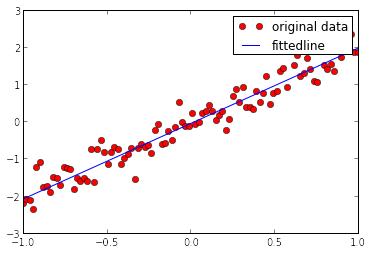

x=0.2,z= [ 0.37894815]


In [28]:
#xunlian
init = tf.global_variables_initializer()
traning_apochs = 20
display_step=2

#保存模型
saver = tf.train.Saver()
savedir = 'log/'

with tf.Session() as sess:
    sess.run(init)
    plotdata={
        'batchsize':[],
        'loss':[],
    }
    for epoch in range(traning_apochs):
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        if epoch % display_step == 0:
            loss=sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print 'epoch',epoch+1,'cost',loss,'w',sess.run(W),'b',sess.run(b)
    print "finished!"
    #保存模型
    
    saver.save(sess,savedir+'linear_regressionmodel.cpkt')
    print'cost=',sess.run(cost,feed_dict={X:train_X,Y:train_Y}),'w=',sess.run(W),'b=',sess.run(b)
    #
    plt.plot(train_X,train_Y,'ro',label='original data')
    plt.plot(train_X,sess.run(W)*train_X+sess.run(b),label='fittedline')
    plt.legend()
    plt.show()
    
    #ceshi
    print 'x=0.2,z=',sess.run(z,feed_dict={X:0.2})

In [36]:
#模型的载入
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2,savedir+'linear_regressionmodel.cpkt')
    print "x=0.2,z=",sess2.run(z,feed_dict={X:0.2})

INFO:tensorflow:Restoring parameters from log/linear_regressionmodel.cpkt
x=0.2,z= [ 0.43973801]
